Problem Definition

Goal: Predict wine quality (score between 0–10) based on physicochemical features.

Dataset: Red Wine Quality dataset from UCI.

Target: quality

Features: All other columns (like acidity, sugar, sulphates, alcohol, etc.)

In [ ]:
!pip -q install --upgrade pip
!pip -q install scikit-learn==1.4.2 mlflow pandas numpy matplotlib seaborn
# this will give errors however ok to proceed

Load and Inspect Dataset
Initial setup to load the Wine Quality dataset and inspect its structure

In [ ]:
import pandas as pd

# Load the red wine  dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

In [ ]:
# Quick inspect
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Check column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#Data Cleaning
Check for missing values, drop duplicates, and rename columns for ease of use.

In [ ]:
# 1. Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Check for duplicate rows
print("Duplicated rows: ",df.duplicated().sum())

Duplicated rows:  240


In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm shape after dropping
print(f"Shape after dropping duplicates: {df.shape}")

Shape after dropping duplicates: (1359, 12)


In [ ]:
#fix the column names
# Remove spaces and convert to snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#Exploratory Data Analysis (EDA)
Visualize distributions and relationships between features and the target (quality)

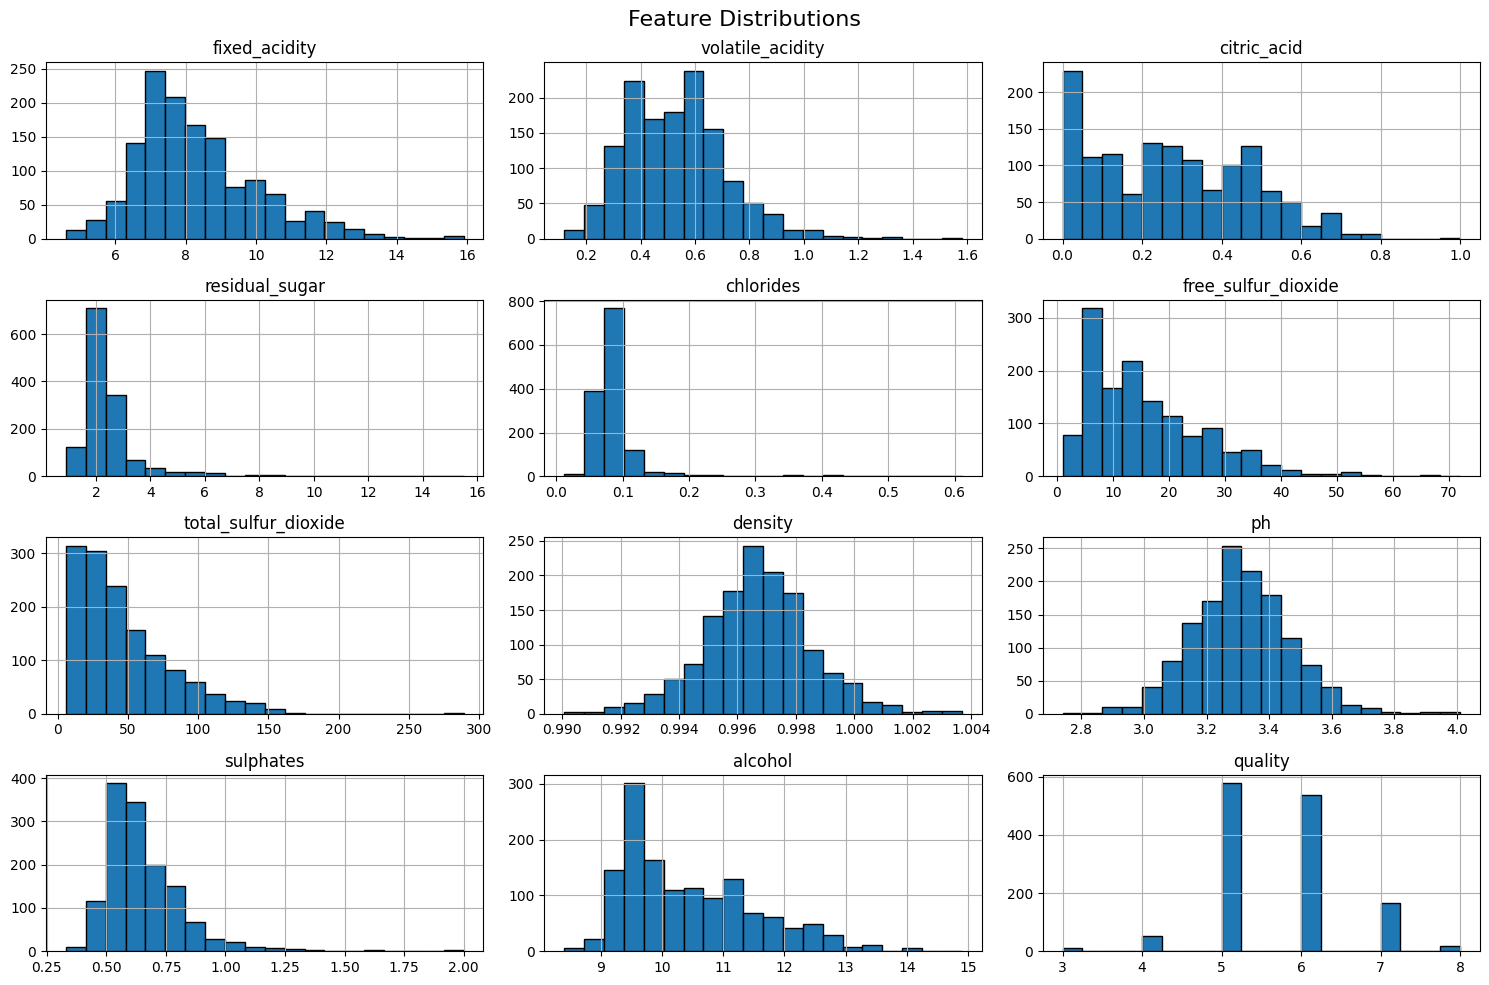

In [ ]:
#EDA (Exploratory Data Analysis)

import matplotlib.pyplot as plt

# Plot histograms for all numeric features
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()



#Correlation Analysis
Visualize the correlation matrix to understand feature-target relationships

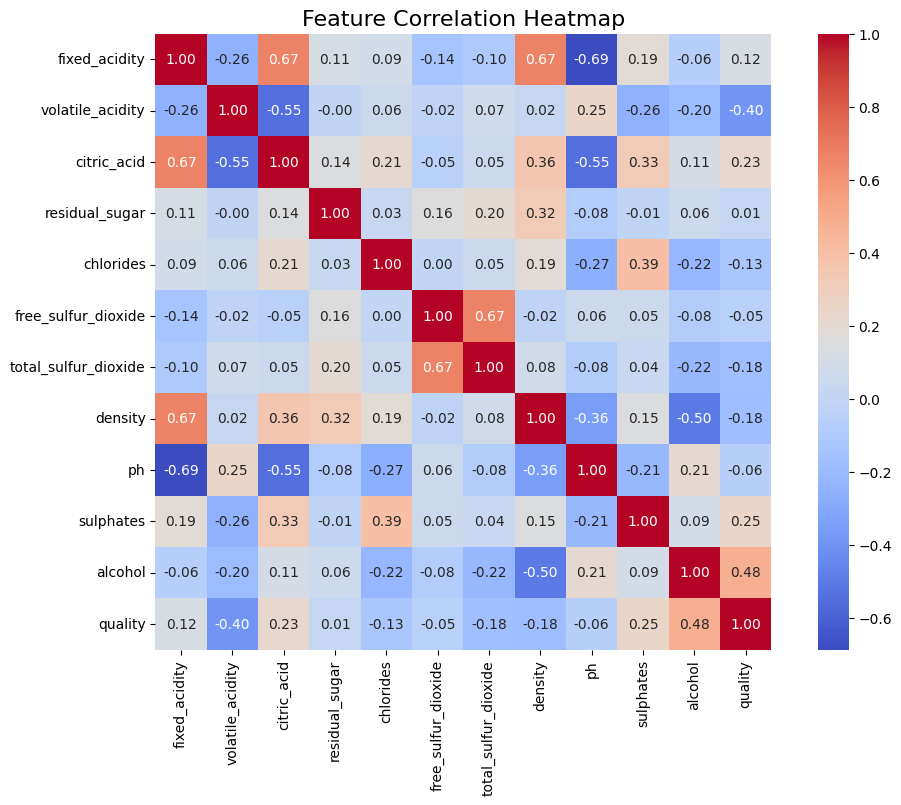

In [ ]:
#Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


#Relationship Analysis
Plot linear trends between selected features and wine quality.

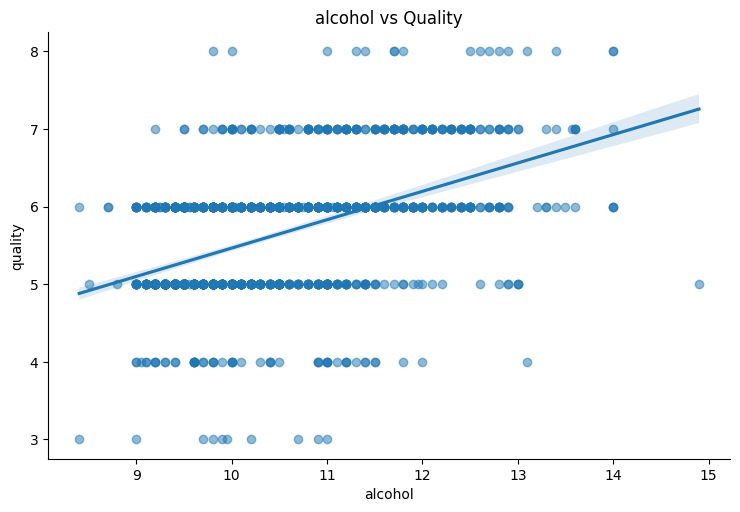

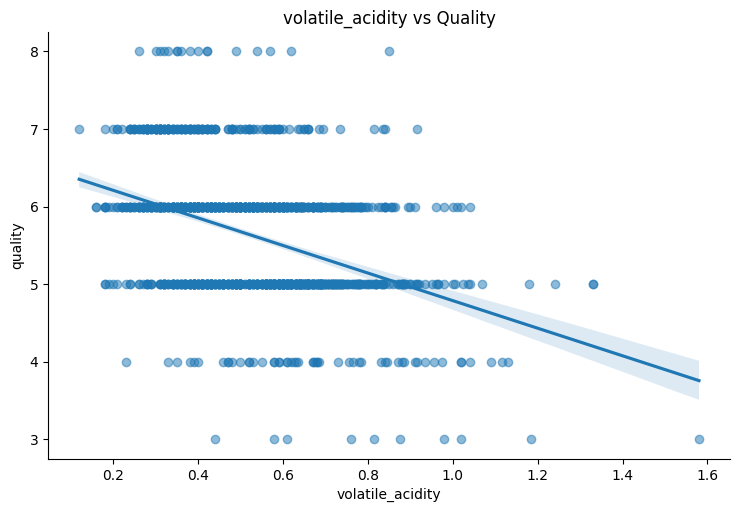

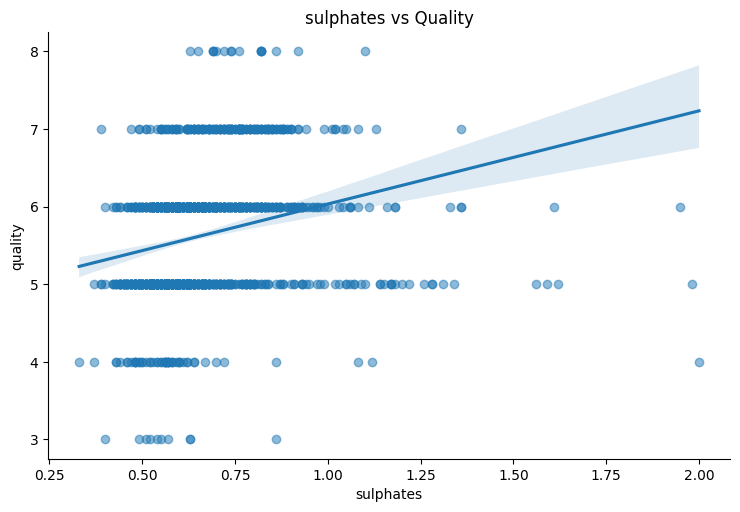

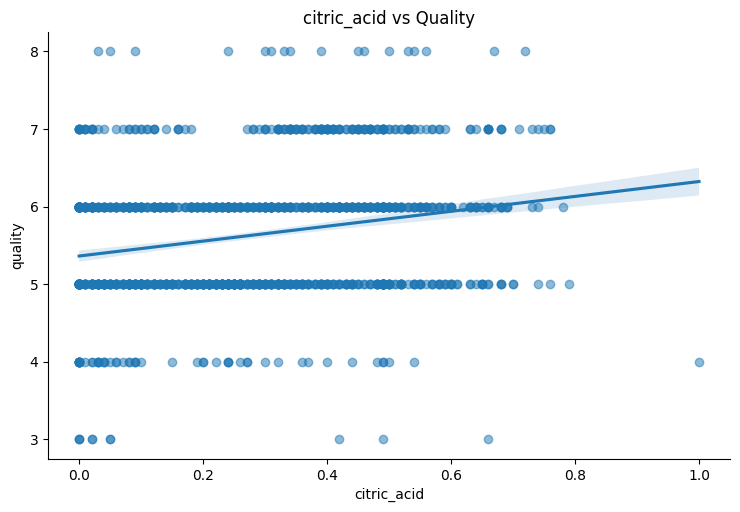

In [ ]:
#Relationships to Quality

# Scatterplots of key features vs quality
key_features = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']

for feature in key_features:
    sns.lmplot(x=feature, y='quality', data=df, aspect=1.5, scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs Quality')
    plt.show()


What the EDA Tells Us

Alcohol has the strongest positive correlation with quality (~0.48).

Volatile acidity has a strong negative correlation (~ -0.40).

Citric acid and sulphates show moderate positive relationships.

Many distributions (e.g., residual sugar, sulphates) are skewed, which might benefit from normalization or transformation.

Problem Definition

Define regression problem:

Predict wine quality (as a numeric score) based on physicochemical properties of red wine

The goal of this project is to predict the **quality** of red wine based on various physicochemical features such as acidity, sulphates, and alcohol content. This is a **regression problem**, where the target variable `quality` is a numeric score ranging from 3 to 8 in this dataset.

We will compare the performance of three models:
- Linear Regression
- Decision Tree Regressor
- XGBoost Regressor

Evaluation metrics will include **R²**, **RMSE**, and **MSE** to determine the best-performing model.

#Feature Scaling
Standardize the features before feeding them into models.

In [ ]:
#Feature-Target Split & Train/Test Split
# Split features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Train/test split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




#Feature Scaling (StandardScaler)

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training and Evaluation
Compare Linear Regression, Decision Tree, and XGBoost models using metrics like MSE, RMSE, and R².

#Train & Evaluate Models

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_preds = lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)




In [ ]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Train decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict and evaluate
dt_preds = dt.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_preds)


In [ ]:
#XGBoost Regressor

from xgboost import XGBRegressor

# Train XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train_scaled, y_train)

# Predict and evaluate
xgb_preds = xgb.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)


#Summary of Results
Compare model performance and summarize insights and recommendations.

#Performance Comparison

In [ ]:
# Collect results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'XGBoost'],
    'MSE': [lr_mse, dt_mse, xgb_mse],
    'RMSE': [lr_rmse, dt_rmse, xgb_rmse],
    'R²': [lr_r2, dt_r2, xgb_r2]
})

# Round for clarity
results = results.round(3)
results.sort_values(by='R²', ascending=False)


,Model,MSE,RMSE,R²
0,Linear Regression,0.431,0.657,0.392
2,XGBoost,0.462,0.680,0.348
1,Decision Tree,0.886,0.941,-0.251


### Findings & Recommendations

- **Linear Regression** performed best overall, achieving an **R² of 0.392**, indicating it could explain about 39% of the variance in wine quality. While not outstanding, it was the most reliable model of the three.
  
- **XGBoost** came in second with an **R² of 0.348**, which was slightly lower than linear regression. This may suggest that the dataset is not large or complex enough for XGBoost to shine, or that more tuning is needed.
  
- **Decision Tree Regressor** performed poorly, returning a **negative R² score (-0.251)**, which implies it did worse than simply predicting the mean of the target variable. This suggests the tree overfit the training data and failed to generalize.

---

#### Insights:

- **Alcohol** had the strongest positive correlation with wine quality.
- **Volatile Acidity** was negatively correlated with quality — wines with higher volatile acidity tended to score lower.
- Several features, like sulphates and citric acid, showed slight positive trends with quality.

---

#### Recommendations for Improvement:

- Apply **hyperparameter tuning** (e.g., GridSearchCV or RandomizedSearchCV) especially for Decision Trees and XGBoost.
- Test **cross-validation** to get more reliable metrics.
- Consider **feature engineering** — polynomial terms or interaction terms might improve performance.
- Alternatively, convert the problem to **classification** (e.g., classify quality into low/medium/high) since wine quality is an ordinal scale.
